#### 7PAM2002-0901-2024 - MSc Data Science Project

Topic - Comparing Data Augmentation Methods – Easy Data Augmentation and Back Translation for text(Intentation) Classification using LSTM.

Research Question - Which data augmentation methods applied on a small dataset outperform models trained without augmentation in terms of accuracy and precision in case of intention(text) classification using LSTM as training models, and by how much do they improve performance?

Supervisor - Dr. Man Lai Tang

Done by - Mohit Agarwal (22031257)

### Importing Packages

In [1]:
# importing required packages...
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [2]:
# appending the location for augment modules
import sys
sys.path.append(r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Agument")
# appending the location for modles modules
sys.path.append(r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Models")

In [3]:
# importing modules from local drives...
import preprocess_eda as preprocess
import lstm
import train_lstm
import back_translation
import eda

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# setiing plot style
plt.style.use("seaborn-v0_8-darkgrid")

#### Defining Paths

In [5]:
# path for augment plot
augment_plot_path = r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Augment"
# path for augment data
augment_data_path = r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Agument\Augment_Data\Training_Validation_Testing"
# model callback path for saving models and log files
model_callback_path = r"D:\MScDataScience\7.Data_Science_Project\Model_Callbacks\Augment"

### Reading Back Translated Augmented Data

In [6]:
# combining the training, validation, testin data for augmentation
whole_data = pd.concat([preprocess.train_df,
                        preprocess.val_df,
                        preprocess.test_df], ignore_index=True)

In [7]:
# reading hi data
back_translated_hi_df, back_translated_hi_train, back_translated_hi_val, back_translated_hi_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"Back_Translation\back_translated_augment_data_hi.csv"), data=whole_data)
# reading es data
back_translated_es_df, back_translated_es_train, back_translated_es_val, back_translated_es_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"Back_Translation\back_translated_augment_data_es.csv"), data=whole_data)
# reading fr data
back_translated_fr_df, back_translated_fr_train, back_translated_fr_val, back_translated_fr_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"Back_Translation\back_translated_augment_data_fr.csv"), data=whole_data)
# reading de data
back_translated_de_df, back_translated_de_train, back_translated_de_val, back_translated_de_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"Back_Translation\back_translated_augment_data_de.csv"), data=whole_data)

## Hindi Language

### Exploratory Data Analysis For back Translated-Hindi Augmented Data

The length of the training data:  12750
The length of the testing data:  7650
The length of the validation data:  5100


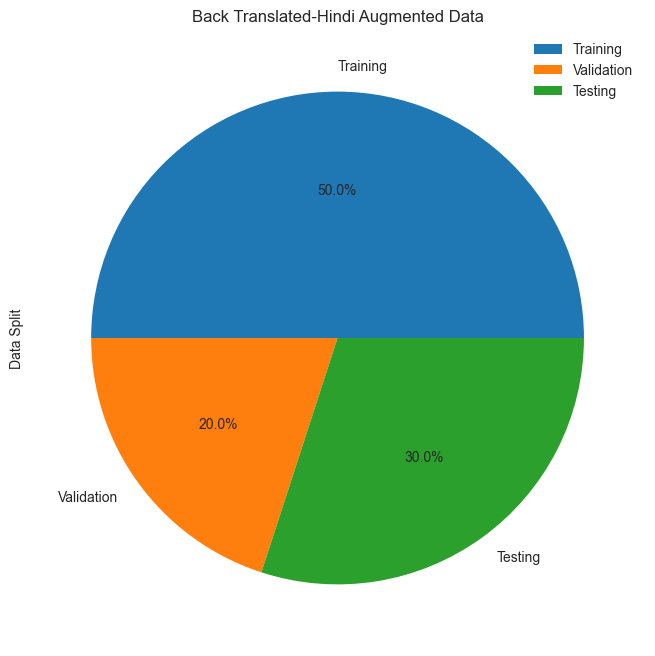

In [8]:
preprocess.records_per_set(train=back_translated_hi_train,
                           val=back_translated_hi_val,
                           test=back_translated_hi_test,
                           title="Back Translated-Hindi Augmented Data")

##### Training Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  2
[INFO] Maximum Number of Charaters in a query is:  142


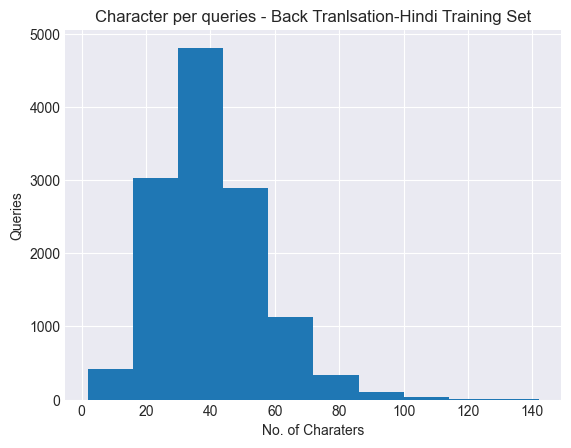

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  25


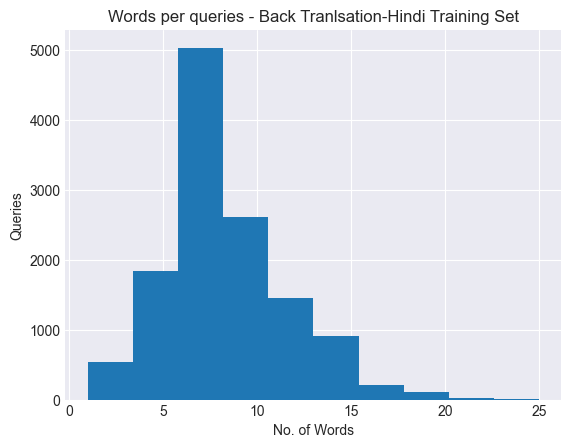

[INFO] Minimum Number of Average Words Length in a query is:  1.8
[INFO] Maximum Number of Average Words Length in a query is:  11.0


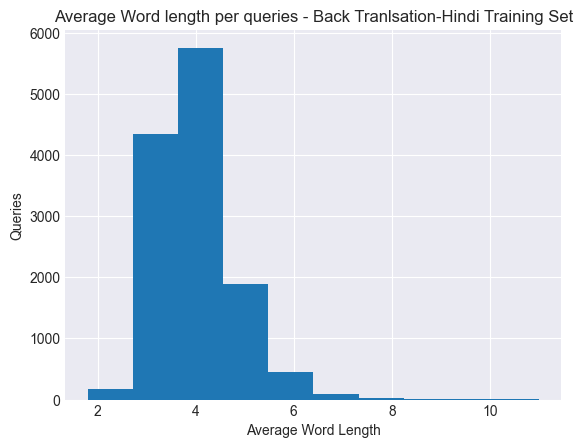


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  5668


In [9]:
# exploring the training data
train_explore_hi = preprocess.eda(data=back_translated_hi_train,
                                  path=os.path.join(augment_plot_path, r"Back_Translation\Before_Preprocessing\Training"))
# plotting number of character per record
train_explore_hi.char_per_query(title="Back Tranlsation-Hindi Training Set")
# plotting number of words per record
train_explore_hi.word_per_query(title="Back Tranlsation-Hindi Training Set")
# plotting average word length per record
train_explore_hi.avg_word_len_per_query(
    title="Back Tranlsation-Hindi Training Set")
# line graph of word frequency per class
train_word_freq_dict_hi = train_explore_hi.word_freq_per_class(
    title="Back Tranlsation-Hindi Training Set")
# worldcloud of word frequency per class
train_worldcloud_dict_hi = train_explore_hi.word_cloud_per_class(
    title="Back Tranlsation-Hindi Training Set")
# number of unique words
train_num_unique_words_hi = train_explore_hi.vocabulary()
print("\n[INFO] The vocabulary size is: ", train_num_unique_words_hi)

The length of the queries is the tarining set is not long. Most queries has in 4 to 11 words, highest beign 25.

##### Validation Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  2
[INFO] Maximum Number of Charaters in a query is:  136


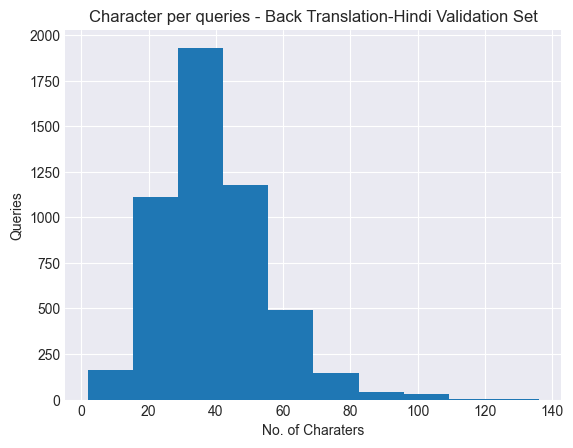

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  29


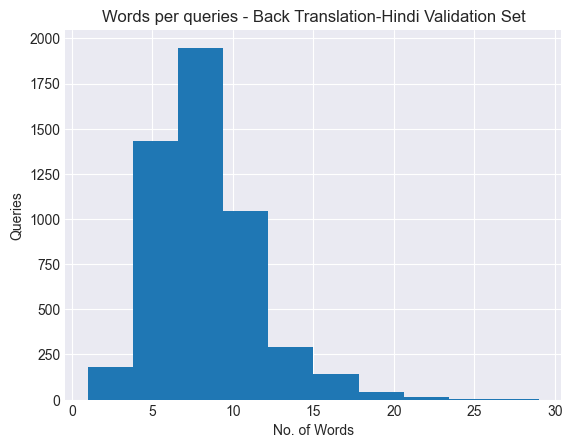

[INFO] Minimum Number of Average Words Length in a query is:  2.0
[INFO] Maximum Number of Average Words Length in a query is:  11.0


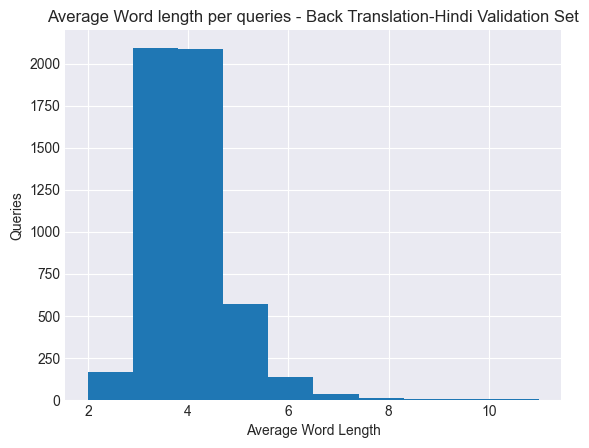


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  3585


In [10]:
# exploring the validation data
val_explore_hi = preprocess.eda(data=back_translated_hi_val,
                                path=os.path.join(augment_plot_path, r"Back_Translation\Before_Preprocessing\Validation"))
# plotting number of character per record
val_explore_hi.char_per_query(title="Back Translation-Hindi Validation Set")
# plotting number of words per record
val_explore_hi.word_per_query(title="Back Translation-Hindi Validation Set")
# plotting average word length per record
val_explore_hi.avg_word_len_per_query(
    title="Back Translation-Hindi Validation Set")
# line graph of word frequency per class
val_word_freq_dict_hi = val_explore_hi.word_freq_per_class(
    title="Back Translation-Hindi Validation Set")
# worldcloud of word frequency per class
val_worldcloud_dict_hi = val_explore_hi.word_cloud_per_class(
    title="Back Translation-Hindi Validation Set")
# number of unique words
val_num_unique_words_hi = val_explore_hi.vocabulary()
print("\n[INFO] The vocabulary size is: ", val_num_unique_words_hi)

The average word

##### Testing Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  2
[INFO] Maximum Number of Charaters in a query is:  121


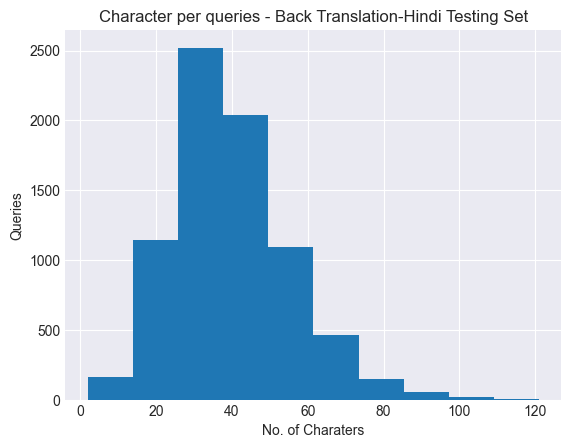

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  26


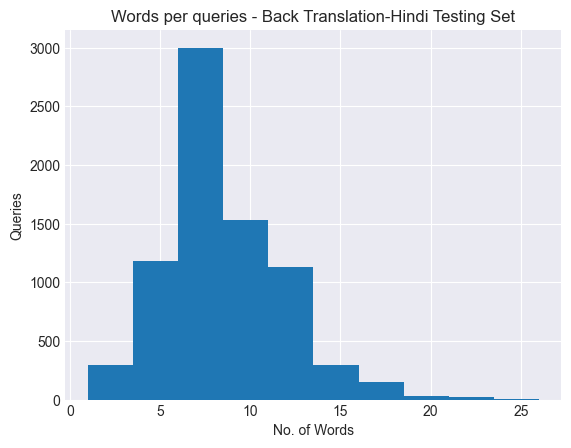

[INFO] Minimum Number of Average Words Length in a query is:  1.8
[INFO] Maximum Number of Average Words Length in a query is:  9.666666666666666


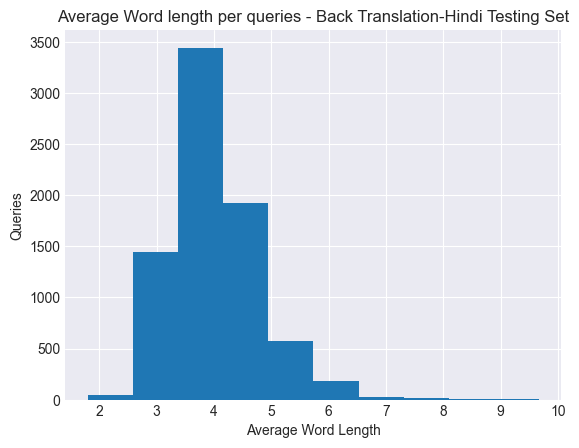


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  4390


In [11]:
# exploring the testing data
test_explore_hi = preprocess.eda(data=back_translated_hi_test,
                                 path=os.path.join(augment_plot_path, r"Back_Translation\Before_Preprocessing\Testing"))
# plotting number of character per record
test_explore_hi.char_per_query(title="Back Translation-Hindi Testing Set")
# plotting number of words per record
test_explore_hi.word_per_query(title="Back Translation-Hindi Testing Set")
# plotting average word length per record
test_explore_hi.avg_word_len_per_query(
    title="Back Translation-Hindi Testing Set")
# line graph of word frequency per class
test_word_freq_dict_hi = test_explore_hi.word_freq_per_class(
    title="Back Translation-Hindi Testing Set")
# worldcloud of word frequency per class
test_worldcloud_dict_hi = test_explore_hi.word_cloud_per_class(
    title="Back Translation-Hindi Testing Set")
# number of unique words
test_num_unique_words_hi = test_explore_hi.vocabulary()
print("\n[INFO] The vocabulary size is: ", test_num_unique_words_hi)

### Preprocessing the back Translated-Hindi Augmented Data

In [12]:
# preprocessing the training set
train_preprocess_hi = preprocess.pre_process(back_translated_hi_train)
x_train_hi = train_preprocess_hi.preprocess()
# lemmentizing the preprocessed data
x_train_hi = train_preprocess_hi.lemmatise()

# encoding the classes to one-hot format
y_train_hi = train_preprocess_hi.encode_class()

In [13]:
# preprocessing the validation set
val_preprocess_hi = preprocess.pre_process(back_translated_hi_val)
x_val_hi = val_preprocess_hi.preprocess()
# lemmentizing the preprocessed data
x_val_hi = val_preprocess_hi.lemmatise()

# encoding the classes to one-hot format
y_val_hi = val_preprocess_hi.encode_class()

In [14]:
# preprocessing the testing set
test_preprocess_hi = preprocess.pre_process(back_translated_hi_test)
x_test_hi = test_preprocess_hi.preprocess()
# lemmentizing the preprocessed data
x_test_hi = test_preprocess_hi.lemmatise()

# encoding the classes to one-hot format
y_test_hi = test_preprocess_hi.encode_class()

### Exploring the Processed Back Translated-Hindi Augmented Datasets

##### Training Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  92


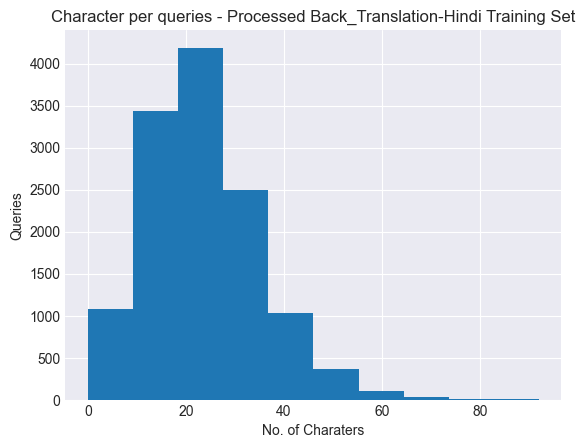

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  14


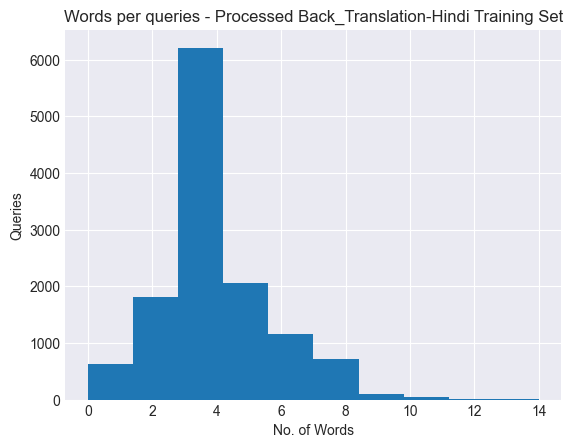

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  14.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


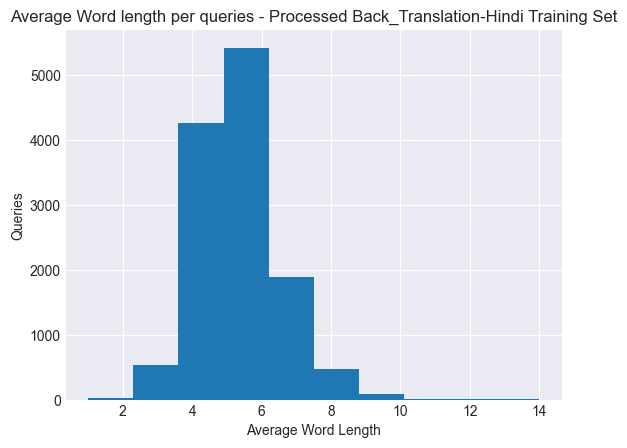


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  3850


In [15]:
# creating processed training dataframe
processed_train_df_hi = pd.DataFrame(({"Query": x_train_hi,
                                       "Intent": back_translated_hi_train.iloc[:, 1]}))
# exploring the processed training data
processed_train_explore_hi = preprocess.eda(data=processed_train_df_hi,
                                            path=os.path.join(augment_plot_path,
                                                              r"Back_Translation\Preprocessed\Training"))
# plotting number of character per record
processed_train_explore_hi.char_per_query(
    title="Processed Back_Translation-Hindi Training Set")
# plotting number of words per record
processed_train_explore_hi.word_per_query(
    title="Processed Back_Translation-Hindi Training Set")
# plotting average word length per record
processed_train_explore_hi.avg_word_len_per_query(
    title="Processed Back_Translation-Hindi Training Set")
# line graph of word frequency per class
processed_train_word_freq_dict_hi = processed_train_explore_hi.word_freq_per_class(
    title="Processed Back_Translation-Hindi Training Set")
# worldcloud of word frequency per class
processed_train_worldcloud_dict_hi = processed_train_explore_hi.word_cloud_per_class(
    title="Processed Back_Translation-Hindi Training Set")
# number of unique words
processed_train_num_unique_words_hi = processed_train_explore_hi.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_train_num_unique_words_hi)

##### Validation Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  82


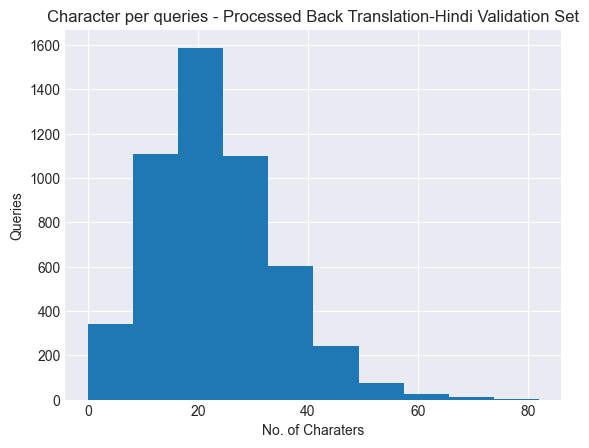

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  13


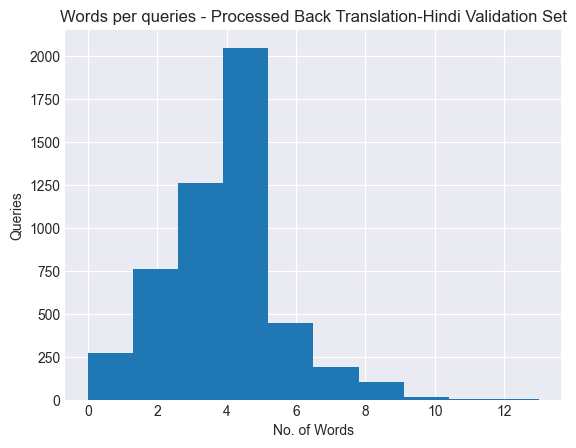

[INFO] Minimum Number of Average Words Length in a query is:  2.0
[INFO] Maximum Number of Average Words Length in a query is:  12.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


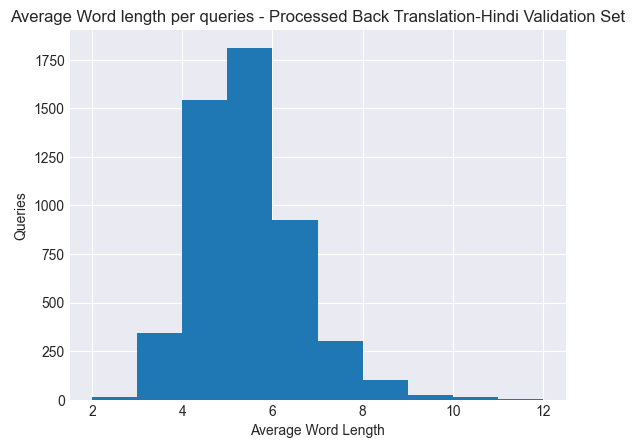


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  2560


In [16]:
# creating processed validation dataframe
processed_val_df_hi = pd.DataFrame(({"Query": x_val_hi,
                                     "Intent": back_translated_hi_val.iloc[:, 1]}))
# exploring the processed validation data
processed_val_explore_hi = preprocess.eda(data=processed_val_df_hi,
                                          path=os.path.join(augment_plot_path,
                                                            r"Back_Translation\Preprocessed\Validation"))
# plotting number of character per record
processed_val_explore_hi.char_per_query(
    title="Processed Back Translation-Hindi Validation Set")
# plotting number of words per record
processed_val_explore_hi.word_per_query(
    title="Processed Back Translation-Hindi Validation Set")
# plotting average word length per record
processed_val_explore_hi.avg_word_len_per_query(
    title="Processed Back Translation-Hindi Validation Set")
# line graph of word frequency per class
processed_val_word_freq_dict_hi = processed_val_explore_hi.word_freq_per_class(
    title="Processed Back Translation-Hindi Validation Set")
# worldcloud of word frequency per class
processed_val_worldcloud_dict_hi = processed_val_explore_hi.word_cloud_per_class(
    title="Processed Back Translation-Hindi Validation Set")
# number of unique words
processed_val_num_unique_words_hi = processed_val_explore_hi.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_val_num_unique_words_hi)

##### Testing Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  85


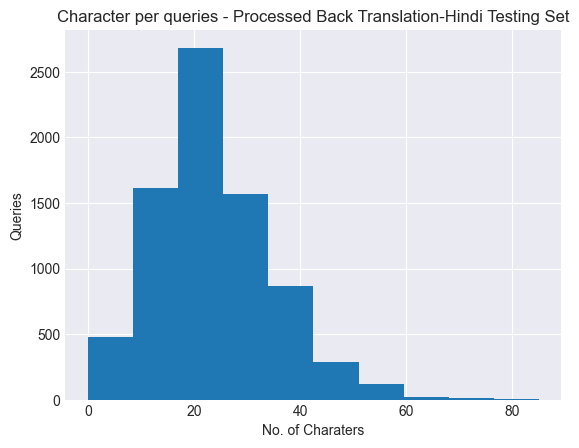

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  14


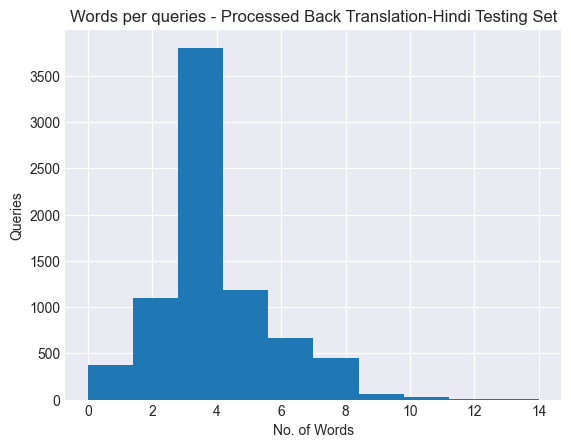

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  12.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


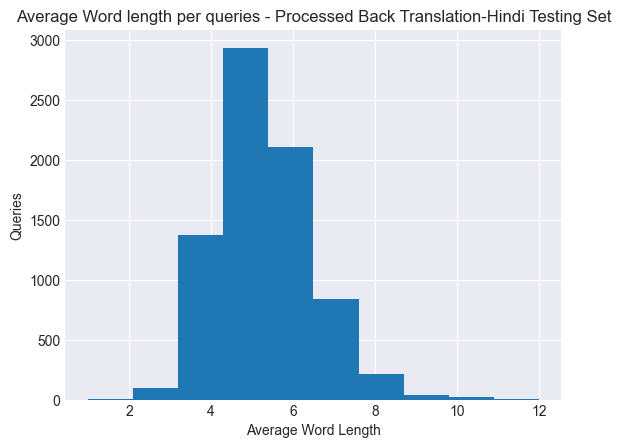


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  3122


In [17]:
# creating processed testing dataframe
processed_test_df_hi = pd.DataFrame(({"Query": x_test_hi,
                                      "Intent": back_translated_hi_test.iloc[:, 1]}))
# exploring the processed testing data
processed_test_explore_hi = preprocess.eda(data=processed_test_df_hi,
                                           path=os.path.join(augment_plot_path,
                                                             r"Back_Translation\Preprocessed\Testing"))
# plotting number of character per record
processed_test_explore_hi.char_per_query(
    title="Processed Back Translation-Hindi Testing Set")
# plotting number of words per record
processed_test_explore_hi.word_per_query(
    title="Processed Back Translation-Hindi Testing Set")
# plotting average word length per record
processed_test_explore_hi.avg_word_len_per_query(
    title="Processed Back Translation-Hindi Testing Set")
# line graph of word frequency per class
processed_test_word_freq_dict_hi = processed_test_explore_hi.word_freq_per_class(
    title="Processed Back Translation-Hindi Testing Set")
# worldcloud of word frequency per class
processed_test_worldcloud_dict_hi = processed_test_explore_hi.word_cloud_per_class(
    title="Processed Back Translation-Hindi Testing Set")
# number of unique words
processed_test_num_unique_words_hi = processed_test_explore_hi.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_test_num_unique_words_hi)

### Creating a textvectorization layer using Keras

In [18]:
# setting vocabulary size
VOCAB_SIZE = 50000
# setting the oputput sequence length for textvector layer
SEQ_LEN = 25
# creating a keras text vector layer
textvector_layer_hi = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                                        ngrams=(1, 2, 3),
                                                        output_mode="int",
                                                        output_sequence_length=SEQ_LEN)
# learning the vocabulary in the dataset from training data
textvector_layer_hi.adapt(x_train_hi)

### Training Using Single-LSTM Model

In [19]:
# single lstm path
single_lstm_model_callback = os.path.join(
    model_callback_path, r"Back_Translation\Single_lstm")

#### Training the Single Layer LSTM Model with best Auto-Hyperparameter

##### For 30 Epochs


Epoch 1/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 2.6816e-05 - f1_score: 0.0034 - loss: 5.0309 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 8.7460e-04 - val_loss: 5.0183 - val_precision: 0.0000e+00
Epoch 2/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.0000e+00 - f1_score: 0.0082 - loss: 4.7206 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0088 - val_loss: 4.1686 - val_precision: 0.0000e+00
Epoch 3/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.0000e+00 - f1_score: 0.0252 - loss: 4.1306 - precision: 0.0920 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0419 - val_loss: 3.5758 - val_precision: 0.0000e+00
Epoch 4/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 1.7064e-05 - f1_score: 0.0576 - loss: 3.5648 - precision: 0.3035 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0831 - val_loss: 3.2067 - val_precision: 0.5625
Epoch 5/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.0000e+00 - f1_s

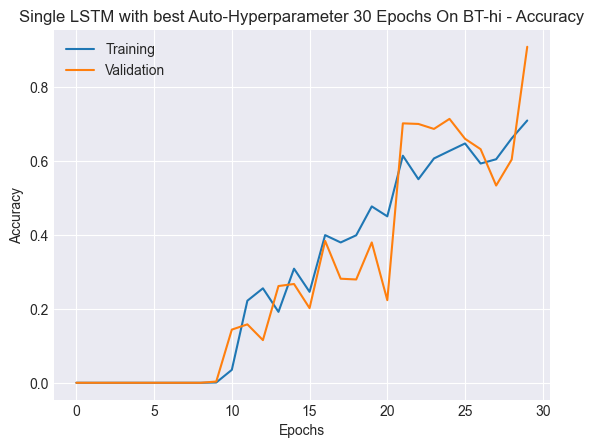

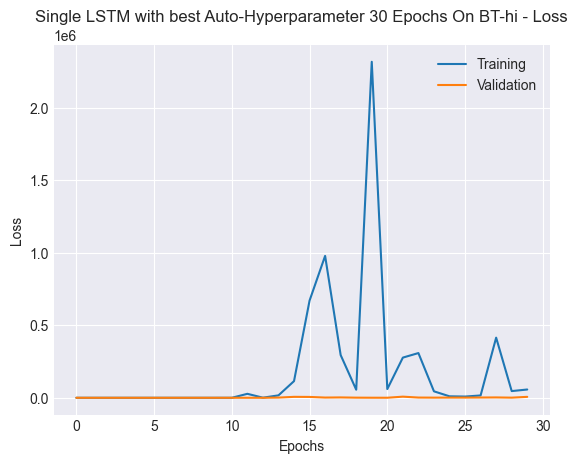

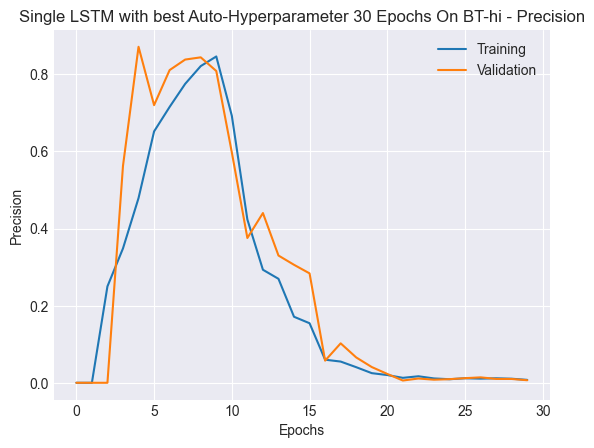

240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9098 - f1_score: 0.0062 - loss: 6471.3877 - precision: 0.0047


<Figure size 640x480 with 0 Axes>

In [20]:
# single lstm model with tuned hyperparamter
hp_lstm_model_30_hi = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                   lstm_units=170,
                                                   rate=0.275,
                                                   activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.0038393475795542604,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_hi)

# fitting the single lstm model
hp_lstm_history_30_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                 x_val=x_val_hi,
                                                 y_val=y_val_hi,
                                                 path=single_lstm_model_callback,
                                                 model=hp_lstm_model_30_hi,
                                                 batch_size=96,
                                                 epochs=30,
                                                 filename="hp_96Batch_30epochs_hi")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_30_hi,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs On BT-hi",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_30_evaluate_hi = hp_lstm_model_30_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

##### For 50 Epochs

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.0000e+00 - f1_score: 0.0038 - loss: 5.0144 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0028 - val_loss: 4.6098 - val_precision: 0.0000e+00
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.0000e+00 - f1_score: 0.0105 - loss: 4.6184 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0124 - val_loss: 4.2633 - val_precision: 0.0000e+00
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.0000e+00 - f1_score: 0.0321 - loss: 4.0307 - precision: 0.0103 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0491 - val_loss: 3.4921 - val_precision: 0.0000e+00
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.0000e+00 - f1_score: 0.0779 - loss: 3.3909 - precision: 0.2314 - val_accuracy: 0.0000e+00 - val_f1_score: 0.1244 - val_loss: 2.8496 - val_precision: 0.6538
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.0000e+00 - f1_score:

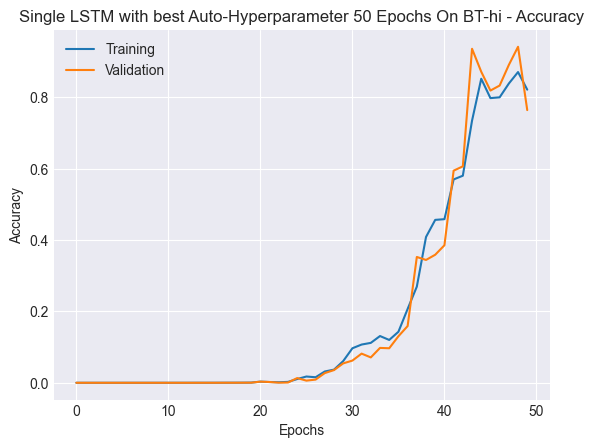

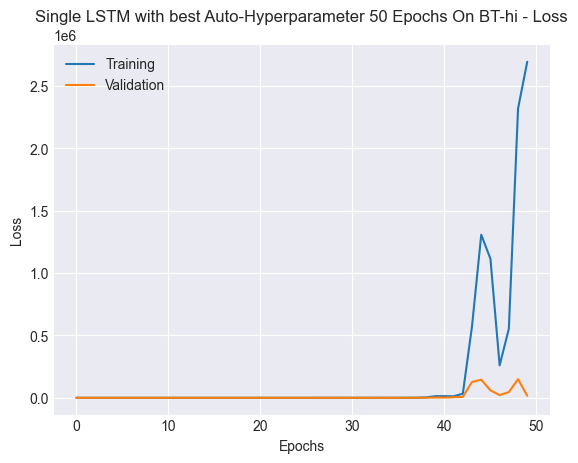

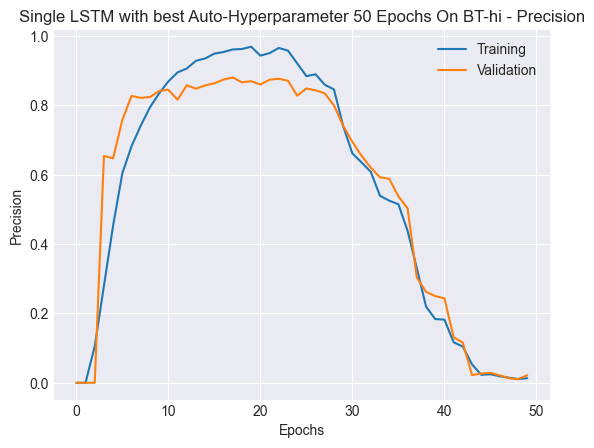

240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7573 - f1_score: 0.0262 - loss: 13389.9756 - precision: 0.0273


<Figure size 640x480 with 0 Axes>

In [21]:
# single lstm model with tuned hyperparamter
hp_lstm_model_50_hi = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                   lstm_units=170,
                                                   rate=0.275,
                                                   activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.0038393475795542604,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_hi)

# fitting the single lstm model to full original dataset
hp_lstm_history_50_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                 x_val=x_val_hi,
                                                 y_val=y_val_hi,
                                                 path=single_lstm_model_callback,
                                                 model=hp_lstm_model_50_hi,
                                                 batch_size=96,
                                                 epochs=50,
                                                 filename="hp_96Batch_50epochs_hi")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_50_hi,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs On BT-hi",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_50_evaluate_hi = hp_lstm_model_50_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

##### For 75 Epochs

Epoch 1/75
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.0000e+00 - f1_score: 0.0026 - loss: 5.0201 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0012 - val_loss: 4.9759 - val_precision: 0.0000e+00
Epoch 2/75
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 2.4092e-06 - f1_score: 0.0061 - loss: 4.8985 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0088 - val_loss: 4.3532 - val_precision: 0.0000e+00
Epoch 3/75
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.0000e+00 - f1_score: 0.0245 - loss: 4.2073 - precision: 0.1280 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0376 - val_loss: 3.5750 - val_precision: 0.0000e+00
Epoch 4/75
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 4.5205e-06 - f1_score: 0.0598 - loss: 3.5942 - precision: 0.3858 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0947 - val_loss: 3.1197 - val_precision: 1.0000
Epoch 5/75
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.0000e+00 - f1_score:

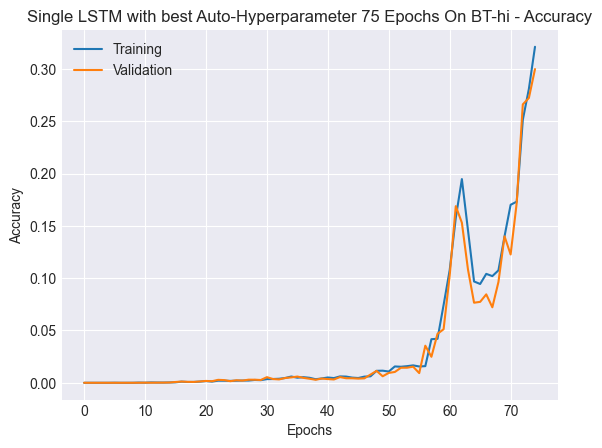

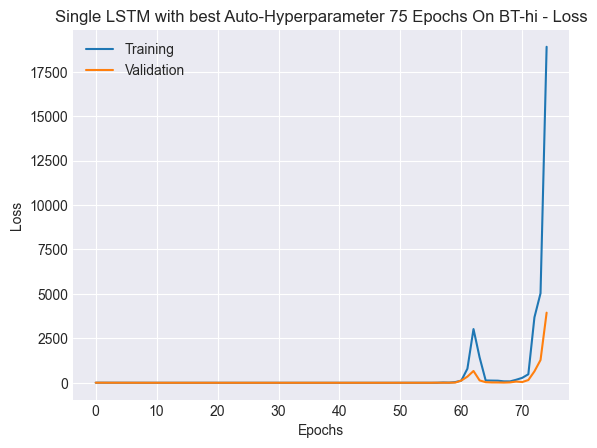

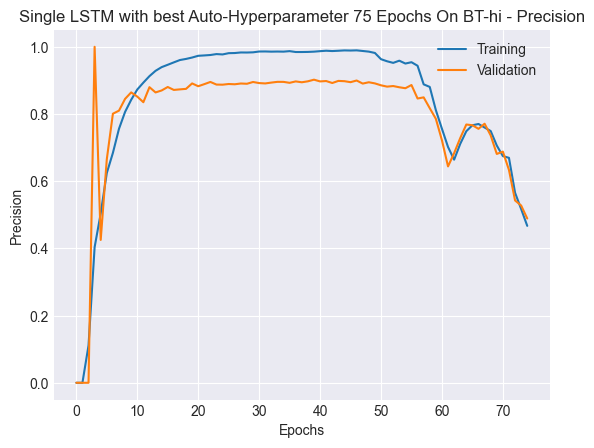

240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2903 - f1_score: 0.4656 - loss: 3428.7454 - precision: 0.5130


<Figure size 640x480 with 0 Axes>

In [22]:
# single lstm model with tuned hyperparamter
hp_lstm_model_75_hi = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                   lstm_units=170,
                                                   rate=0.275,
                                                   activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.0038393475795542604,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_hi)

# fitting the single lstm model to full original dataset
hp_lstm_history_75_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                 x_val=x_val_hi,
                                                 y_val=y_val_hi,
                                                 path=single_lstm_model_callback,
                                                 model=hp_lstm_model_75_hi,
                                                 batch_size=96,
                                                 epochs=75,
                                                 filename="hp_96Batch_75epochs_hi")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_75_hi,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs On BT-hi",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_75_evaluate_hi = hp_lstm_model_75_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

#### Training the Single Layer LSTM Model with Last best Sets of Auto-Hyperparameter

##### For 30 Epochs

Epoch 1/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 1.8286e-05 - f1_score: 0.0037 - loss: 5.0134 - precision: 0.2409 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0034 - val_loss: 4.5435 - val_precision: 0.0000e+00
Epoch 2/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 1.5098e-04 - f1_score: 0.0318 - loss: 4.1502 - precision: 0.4874 - val_accuracy: 1.5556e-04 - val_f1_score: 0.1230 - val_loss: 3.1972 - val_precision: 0.8036
Epoch 3/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.0022 - f1_score: 0.2169 - loss: 2.7061 - precision: 0.7277 - val_accuracy: 0.0095 - val_f1_score: 0.5084 - val_loss: 1.9447 - val_precision: 0.8934
Epoch 4/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.0269 - f1_score: 0.6136 - loss: 1.3281 - precision: 0.8652 - val_accuracy: 0.0382 - val_f1_score: 0.7150 - val_loss: 1.3850 - val_precision: 0.9040
Epoch 5/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.0696 - f1_score: 0.8332 - loss: 0.5933 - precision: 

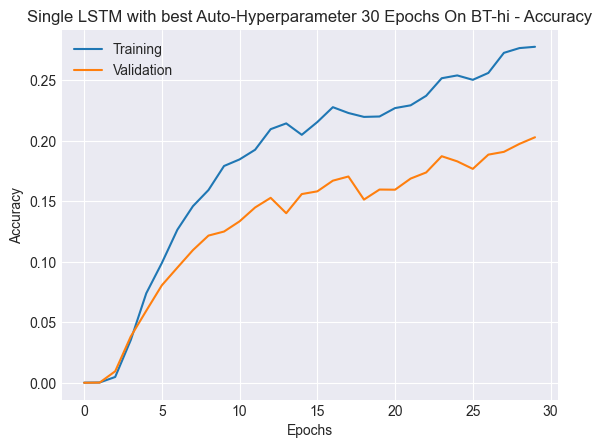

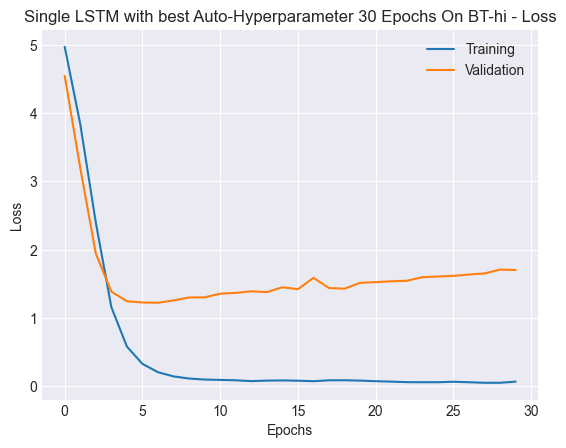

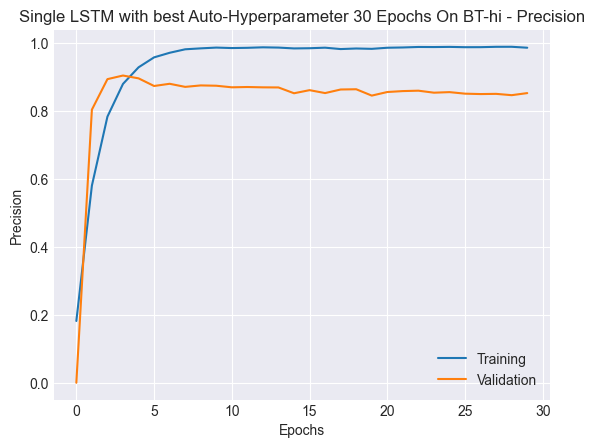

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2094 - f1_score: 0.7879 - loss: 1.7188 - precision: 0.8405


<Figure size 640x480 with 0 Axes>

In [26]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_30_hi = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                       lstm_units=35,
                                                       rate=0.275,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.007121072966581653,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_hi)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_30_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                     x_val=x_val_hi,
                                                     y_val=y_val_hi,
                                                     path=single_lstm_model_callback,
                                                     model=old_hp_lstm_model_30_hi,
                                                     batch_size=96,
                                                     epochs=30,
                                                     filename="hp_96Batch_30epochs_hi")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_30_hi,
                             title="Single LSTM with best Auto-Hyperparameter 30 Epochs On BT-hi",
                             path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_30_evaluate_hi = old_hp_lstm_model_30_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_50_hi = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                       lstm_units=35,
                                                       rate=0.275,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.007121072966581653,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_hi)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_50_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                     x_val=x_val_hi,
                                                     y_val=y_val_hi,
                                                     path=single_lstm_model_callback,
                                                     model=old_hp_lstm_model_50_hi,
                                                     batch_size=96,
                                                     epochs=50,
                                                     filename="hp_96Batch_50epochs_hi")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_50_hi,
                             title="Single LSTM with best Auto-Hyperparameter 50 Epochs On BT-hi",
                             path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_50_evaluate_hi = old_hp_lstm_model_50_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.0000e+00 - f1_score: 0.0035 - loss: 4.9705 - precision: 0.0792 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0172 - val_loss: 4.0656 - val_precision: 0.5238
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 3.0098e-05 - f1_score: 0.0840 - loss: 3.6626 - precision: 0.5640 - val_accuracy: 2.4837e-04 - val_f1_score: 0.4043 - val_loss: 2.2353 - val_precision: 0.9125
Epoch 3/50
108/133 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0027 - f1_score: 0.4871 - loss: 1.7540 - precision: 0.8269

##### For 75 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_75_hi = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                       lstm_units=35,
                                                       rate=0.275,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.007121072966581653,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_hi)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_75_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                     x_val=x_val_hi,
                                                     y_val=y_val_hi,
                                                     path=single_lstm_model_callback,
                                                     model=old_hp_lstm_model_75_hi,
                                                     batch_size=96,
                                                     epochs=75,
                                                     filename="hp_96Batch_75epochs_hi")
# plottiing the mertics
old_hp_lstm_model_75_hi.plot(history=old_hp_lstm_history_75_hi,
                             title="Single LSTM with best Auto-Hyperparameter 75 Epochs On BT-hi",
                             path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_75_evaluate_hi = old_hp_lstm_model_75_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

### Training Using Stacked-LSTM Model

In [ ]:
# stacked lstm path
stacked_lstm_model_callback = os.path.join(
    model_callback_path, r"Back_Translation\Stacked_lstm")

#### Training the Stacked LSTM Model with best Auto-Hyperparameter

##### For 30 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_stacked_model_30_hi = train_lstm.stacked_lstm_model(embedding_seq_length=10,
                                                       lstm_units1=80,
                                                       lstm_units2=165,
                                                       rate1=0.5,
                                                       rate2=0.5,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.00489866406915217,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_hi)

# fitting the single lstm model to full original dataset
hp_stacked_history_30_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                    x_val=x_val_hi,
                                                    y_val=y_val_hi,
                                                    path=stacked_lstm_model_callback,
                                                    model=hp_stacked_model_30_hi,
                                                    batch_size=48,
                                                    epochs=30,
                                                    filename="hp_48Batch_30epochs_hi")
# plottiing the mertics
train_lstm.plot(history=hp_stacked_history_30_hi,
                title="Stacked LSTM with best Auto-Hyperparameter 30 Epochs on BT-hi",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Stacked_LSTM"))

# evaluating the model with test dataset
hp_stacked_model_30_evaluate_hi = hp_stacked_model_30_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_stacked_model_50_hi = train_lstm.stacked_lstm_model(embedding_seq_length=10,
                                                       lstm_units1=80,
                                                       lstm_units2=165,
                                                       rate1=0.5,
                                                       rate2=0.5,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.00489866406915217,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_hi)

# fitting the single lstm model to full original dataset
hp_stacked_history_50_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                    x_val=x_val_hi,
                                                    y_val=y_val_hi,
                                                    path=stacked_lstm_model_callback,
                                                    model=hp_stacked_model_50_hi,
                                                    batch_size=48,
                                                    epochs=50,
                                                    filename="hp_48Batch_50epochs_hi")
# plottiing the mertics
train_lstm.plot(history=hp_stacked_history_50_hi,
                title="Stacked LSTM with best Auto-Hyperparameter 50 Epochs on BT-hi",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Stacked_LSTM"))

# evaluating the model with test dataset
hp_stacked_model_50_evaluate_hi = hp_stacked_model_50_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

#### Training the Stacked LSTM Model with Last best Sets of Auto-Hyperparameter

##### For 30 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_stacked_model_30_hi = train_lstm.stacked_lstm_model(embedding_seq_length=110,
                                                           lstm_units1=110,
                                                           lstm_units2=140,
                                                           rate1=0.525,
                                                           rate2=0.325,
                                                           activation="selu",
                                                           optimizer="Nadam",
                                                           lr=0.00956634035983909,
                                                           num_class=preprocess.num_intent,
                                                           vocab_size=VOCAB_SIZE,
                                                           textvector_layer=textvector_layer_hi)

# fitting the single lstm model to full original dataset
old_hp_stacked_history_30_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                        x_val=x_val_hi,
                                                        y_val=y_val_hi,
                                                        path=stacked_lstm_model_callback,
                                                        model=hp_stacked_model_30_hi,
                                                        batch_size=176,
                                                        epochs=30,
                                                        filename="old_hp_176Batch_30epochs_hi")
# plottiing the mertics
train_lstm.plot(history=old_hp_stacked_history_30_hi,
                title="Stacked LSTM with Auto-Hyperparameter 30 Epochs on BT-hi",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))
# evaluating the model with test dataset
old_hp_stacked_model_30_evaluate_hi = old_hp_stacked_model_30_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_stacked_model_50_hi = train_lstm.stacked_lstm_model(embedding_seq_length=110,
                                                           lstm_units1=110,
                                                           lstm_units2=140,
                                                           rate1=0.525,
                                                           rate2=0.325,
                                                           activation="selu",
                                                           optimizer="Nadam",
                                                           lr=0.00956634035983909,
                                                           num_class=preprocess.num_intent,
                                                           vocab_size=VOCAB_SIZE,
                                                           textvector_layer=textvector_layer_hi)

# fitting the single lstm model to full original dataset
old_hp_stacked_history_50_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                        x_val=x_val_hi,
                                                        y_val=y_val_hi,
                                                        path=stacked_lstm_model_callback,
                                                        model=hp_stacked_model_50_hi,
                                                        batch_size=176,
                                                        epochs=50,
                                                        filename="old_hp_176Batch_50epochs_hi")
# plottiing the mertics
train_lstm.plot(history=old_hp_stacked_history_50_hi,
                title="Stacked LSTM with Auto-Hyperparameter 50 Epochs on BT-hi",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_stacked_model_50_evaluate_hi = old_hp_stacked_model_50_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

### Training Using Convo-LSTM Model

In [ ]:
# stacked lstm path
convo_lstm_model_callback = os.path.join(
    model_callback_path, r"Back_Translation\Convo_lstm")

#### Training the Convo-LSTM Model with best Auto-Hyperparameter

In [ ]:
# convo lstm model with tuned hyperparamter
hp_convo_model_30_hi = train_lstm.convo_lstm_model(embedding_seq_length=70,
                                                   convo_filters=352,
                                                   convo_rate=0.275,
                                                   kernel_size=6,
                                                   convo_activation="elu",
                                                   lstm_units=135,
                                                   lstm_rate=0.2,
                                                   lstm_activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.018327591765327517,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_hi)

# fitting the single lstm model to full original dataset
hp_convo_history_30_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                  x_val=x_val_hi,
                                                  y_val=y_val_hi,
                                                  path=convo_lstm_model_callback,
                                                  model=hp_convo_model_30_hi,
                                                  batch_size=240,
                                                  epochs=30,
                                                  filename="hp_240Batch_30epochs_hi")
# plottiing the mertics
train_lstm.plot(history=hp_convo_history_30_hi,
                title="Convo-LSTM with best Auto-Hyperparameter 30 Epochs on BT-hi",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Convo_LSTM"))

# evaluating the model with test dataset
hp_convo_model_30_evaluate_hi = hp_convo_model_30_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

#### Training the Convo-LSTM Model with Last best Sets of Auto-Hyperparameter

In [ ]:
# convo lstm model with tuned hyperparamter
old_hp_convo_model_30_hi = train_lstm.convo_lstm_model(embedding_seq_length=150,
                                                         convo_filters=320,
                                                         convo_rate=0.675,
                                                         kernel_size=3,
                                                         convo_activation="elu",
                                                         lstm_units=145,
                                                         lstm_rate=0.5,
                                                         lstm_activation="elu",
                                                         optimizer="Adam",
                                                         lr=0.009372089740136636,
                                                         num_class=preprocess.num_intent,
                                                         vocab_size=VOCAB_SIZE,
                                                         textvector_layer=textvector_layer_hi)

# fitting the single lstm model to full original dataset
old_hp_convo_history_30_hi = train_lstm.model_history(x=x_train_hi, y=y_train_hi,
                                                        x_val=x_val_hi,
                                                        y_val=y_val_hi,
                                                        path=convo_lstm_model_callback,
                                                        model=old_hp_convo_model_30_hi,
                                                        batch_size=16,
                                                        epochs=30,
                                                        filename="old_hp_16Batch_30epochs_hi")
# plottiing the mertics
train_lstm.plot(history=old_hp_convo_history_30_hi,
                title="Convo-LSTM with best Auto-Hyperparameter 30 Epochs BT-hi",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_convo_model_30_evaluate_hi = old_hp_convo_model_30_hi.evaluate(
    x=x_test_hi, y=y_test_hi, verbose=1)

## Spanish Language

### Exploratory Data Analysis For back Translated-Hindi Augmented Data

In [ ]:
preprocess.records_per_set(train=back_translated_es_train,
                           val=back_translated_es_val,
                           test=back_translated_es_train,
                           title="Back Translated-Spanish Augmented Data")

##### Training Set - Before Preprocessing

In [ ]:
# exploring the training data
train_explore_es = preprocess.eda(data=back_translated_es_train,
                                  path=os.path.join(augment_plot_path, r"Back_Tranlsation\Before_Preprocessing\Training"))
# plotting number of character per record
train_explore_es.char_per_query(title="Back Tranlsation-Spanish Training Set")
# plotting number of words per record
train_explore_es.word_per_query(title="Back Tranlsation-Spanish Training Set")
# plotting average word length per record
train_explore_es.avg_word_len_per_query(
    title="Back Tranlsation-Spanish Training Set")
# line graph of word frequency per class
train_word_freq_dict_es = train_explore_es.word_freq_per_class(
    title="Back Tranlsation-Spanish Training Set")
# worldcloud of word frequency per class
train_worldcloud_dict_es = train_explore_es.word_cloud_per_class(
    title="Back Tranlsation-Spanish Training Set")
# number of unique words
train_num_unique_words_es = train_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", train_num_unique_words_es)

The length of the queries is the tarining set is not long. Most queries has in 4 to 11 words, highest beign 25.

##### Validation Set - Before Preprocessing

In [ ]:
# exploring the validation data
val_explore_es = preprocess.eda(data=back_translated_es_val,
                                path=os.path.join(augment_plot_path, r"Back_Translation\Before_Preprocessing\Validation"))
# plotting number of character per record
val_explore_es.char_per_query(title="Back Translation-Spanish Validation Set")
# plotting number of words per record
val_explore_es.word_per_query(title="Back Translation-Spanish Validation Set")
# plotting average word length per record
val_explore_es.avg_word_len_per_query(
    title="Back Translation-Spanish Validation Set")
# line graph of word frequency per class
val_word_freq_dict_es = val_explore_es.word_freq_per_class(
    title="Back Translation-Spanish Validation Set")
# worldcloud of word frequency per class
val_worldcloud_dict_es = val_explore_es.word_cloud_per_class(
    title="Back Translation-Spanish Validation Set")
# number of unique words
val_num_unique_words_es = val_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", val_num_unique_words_es)

The average word

##### Testing Set - Before Preprocessing

In [ ]:
# exploring the testing data
test_explore_es = preprocess.eda(data=back_translated_es_test,
                                 path=os.path.join(augment_plot_path, r"Back_Translation\Before_Preprocessing\Testing"))
# plotting number of character per record
test_explore_es.char_per_query(title="Back Translation-Spanish Testing Set")
# plotting number of words per record
test_explore_es.word_per_query(title="Back Translation-Spanish Testing Set")
# plotting average word length per record
test_explore_es.avg_word_len_per_query(
    title="Back Translation-Spanish Testing Set")
# line graph of word frequency per class
test_word_freq_dict_es = test_explore_es.word_freq_per_class(
    title="Back Translation-Spanish Testing Set")
# worldcloud of word frequency per class
test_worldcloud_dict_es = test_explore_es.word_cloud_per_class(
    title="Back Translation-Spanish Testing Set")
# number of unique words
test_num_unique_words_es = test_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", test_num_unique_words_es)

### Preprocessing the back Translated-Spanish Augmented Data

In [16]:
# preprocessing the training set
train_preprocess_es = preprocess.pre_process(back_translated_es_train)
x_train_es = train_preprocess_es.preprocess()
# lemmentizing the preprocessed data
x_train_es = train_preprocess_es.lemmatise()

# encoding the classes to one-hot format
y_train_es = train_preprocess_es.encode_class()

In [17]:
# preprocessing the validation set
val_preprocess_es = preprocess.pre_process(back_translated_es_val)
x_val_es = val_preprocess_es.preprocess()
# lemmentizing the preprocessed data
x_val_es = val_preprocess_es.lemmatise()

# encoding the classes to one-hot format
y_val_es = val_preprocess_es.encode_class()

In [18]:
# preprocessing the testing set
test_preprocess_es = preprocess.pre_process(back_translated_es_test)
x_test_es = test_preprocess_es.preprocess()
# lemmentizing the preprocessed data
x_test_es = test_preprocess_es.lemmatise()

# encoding the classes to one-hot format
y_test_es = test_preprocess_es.encode_class()

### Exploring the Processed Back Translated-Spanish Augmented Datasets

##### Training Set

In [ ]:
# creating processed training dataframe
processed_train_df_es = pd.DataFrame(({"Query": x_train_es,
                                       "Intent": back_translated_es_train.iloc[:, 1]}))
# exploring the processed training data
processed_train_explore_es = preprocess.eda(data=processed_train_df_es,
                                            path=os.path.join(augment_plot_path,
                                                              r"Back_Translation\Preprocessed\Training"))
# plotting number of character per record
processed_train_explore_es.char_per_query(
    title="Processed Back_Translation-Spanish Training Set")
# plotting number of words per record
processed_train_explore_es.word_per_query(
    title="Processed Back_Translation-Spanish Training Set")
# plotting average word length per record
processed_train_explore_es.avg_word_len_per_query(
    title="Processed Back_Translation-Spanish Training Set")
# line graph of word frequency per class
processed_train_word_freq_dict_es = processed_train_explore_es.word_freq_per_class(
    title="Processed Back_Translation-Spanish Training Set")
# worldcloud of word frequency per class
processed_train_worldcloud_dict_es = processed_train_explore_es.word_cloud_per_class(
    title="Processed Back_Translation-Spanish Training Set")
# number of unique words
processed_train_num_unique_words_es = processed_train_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_train_num_unique_words_es)

##### Validation Set

In [ ]:
# creating processed validation dataframe
processed_val_df_es = pd.DataFrame(({"Query": x_val_es,
                                     "Intent": back_translated_es_val.iloc[:, 1]}))
# exploring the processed validation data
processed_val_explore_es = preprocess.eda(data=processed_val_df_es,
                                          path=os.path.join(augment_plot_path,
                                                            r"Back_Translation\Preprocessed\Validation"))
# plotting number of character per record
processed_val_explore_es.char_per_query(
    title="Processed Back Translation-Spanish Validation Set")
# plotting number of words per record
processed_val_explore_es.word_per_query(
    title="Processed Back Translation-Spanish Validation Set")
# plotting average word length per record
processed_val_explore_es.avg_word_len_per_query(
    title="Processed Back Translation-Spanish Validation Set")
# line graph of word frequency per class
processed_val_word_freq_dict_es = processed_val_explore_es.word_freq_per_class(
    title="Processed Back Translation-Spanish Validation Set")
# worldcloud of word frequency per class
processed_val_worldcloud_dict_es = processed_val_explore_es.word_cloud_per_class(
    title="Processed Back Translation-Spanish Validation Set")
# number of unique words
processed_val_num_unique_words_es = processed_val_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_val_num_unique_words_es)

##### Testing Set

In [ ]:
# creating processed testing dataframe
processed_test_df_es = pd.DataFrame(({"Query": x_test_es,
                                      "Intent": back_translated_es_test.iloc[:, 1]}))
# exploring the processed testing data
processed_test_explore_es = preprocess.eda(data=processed_test_df_es,
                                           path=os.path.join(augment_plot_path,
                                                             r"Back_Translation\Preprocessed\Testing"))
# plotting number of character per record
processed_test_explore_es.char_per_query(
    title="Processed Back Translation-Spanish Testing Set")
# plotting number of words per record
processed_test_explore_es.word_per_query(
    title="Processed Back Translation-Spanish Testing Set")
# plotting average word length per record
processed_test_explore_es.avg_word_len_per_query(
    title="Processed Back Translation-Spanish Testing Set")
# line graph of word frequency per class
processed_test_word_freq_dict_es = processed_test_explore_es.word_freq_per_class(
    title="Processed Back Translation-Spanish Testing Set")
# worldcloud of word frequency per class
processed_test_worldcloud_dict_es = processed_test_explore_es.word_cloud_per_class(
    title="Processed Back Translation-Spanish Testing Set")
# number of unique words
processed_test_num_unique_words_es = processed_test_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_test_num_unique_words_es)

### Creating a textvectorization layer using Keras

In [19]:
# setting vocabulary size
VOCAB_SIZE = 50000
# setting the oputput sequence length for textvector layer
SEQ_LEN = 25
# creating a keras text vector layer
textvector_layer_es = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                                        ngrams=(1, 2, 3),
                                                        output_mode="int",
                                                        output_sequence_length=SEQ_LEN)
# learning the vocabulary in the dataset from training data
textvector_layer_es.adapt(x_train_es)

### Training Using Single-LSTM Model

#### Training the Single Layer LSTM Model with best Auto-Hyperparameter

##### For 30 Epochs

In [20]:
# single lstm model with tuned hyperparamter
hp_lstm_model_30_es = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                   lstm_units=170,
                                                   rate=0.275,
                                                   activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.0038393475795542604,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_lstm_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                 x_val=x_val_es,
                                                 y_val=y_val_es,
                                                 path=single_lstm_model_callback,
                                                 model=hp_lstm_model_30_es,
                                                 batch_size=96,
                                                 epochs=30,
                                                 filename="hp_96Batch_30epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_30_es,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs On BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_30_evaluate_es = hp_lstm_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

Epoch 1/30


UnicodeEncodeError: 'charmap' codec can't encode characters in position 74556-74557: character maps to <undefined>

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_lstm_model_50_es = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                   lstm_units=170,
                                                   rate=0.275,
                                                   activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.0038393475795542604,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_lstm_history_50_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                 x_val=x_val_es,
                                                 y_val=y_val_es,
                                                 path=single_lstm_model_callback,
                                                 model=hp_lstm_model_50_es,
                                                 batch_size=96,
                                                 epochs=50,
                                                 filename="hp_96Batch_50epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_50_es,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs On BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_50_evaluate_es = hp_lstm_model_50_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

##### For 75 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_lstm_model_75_es = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                   lstm_units=170,
                                                   rate=0.275,
                                                   activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.0038393475795542604,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_lstm_history_75_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                 x_val=x_val_es,
                                                 y_val=y_val_es,
                                                 path=single_lstm_model_callback,
                                                 model=hp_lstm_model_75_es,
                                                 batch_size=96,
                                                 epochs=75,
                                                 filename="hp_96Batch_75epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_75_es,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs On BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_75_evaluate_es = hp_lstm_model_75_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

#### Training the Single Layer LSTM Model with Last best Sets of Auto-Hyperparameter

##### For 30 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_30_es = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                       lstm_units=35,
                                                       rate=0.275,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.007121072966581653,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                     x_val=x_val_es,
                                                     y_val=y_val_es,
                                                     path=single_lstm_model_callback,
                                                     model=old_hp_lstm_model_30_es,
                                                     batch_size=96,
                                                     epochs=30,
                                                     filename="hp_96Batch_30epochs_es")
# plottiing the mertics
old_hp_lstm_model_30_es.plot(history=old_hp_lstm_history_30_es,
                             title="Single LSTM with best Auto-Hyperparameter 30 Epochs On BT-es",
                             path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_30_evaluate_es = old_hp_lstm_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_50_es = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                       lstm_units=35,
                                                       rate=0.275,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.007121072966581653,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_50_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                     x_val=x_val_es,
                                                     y_val=y_val_es,
                                                     path=single_lstm_model_callback,
                                                     model=old_hp_lstm_model_50_es,
                                                     batch_size=96,
                                                     epochs=50,
                                                     filename="hp_96Batch_50epochs_es")
# plottiing the mertics
old_hp_lstm_model_50_es.plot(history=old_hp_lstm_history_50_es,
                             title="Single LSTM with best Auto-Hyperparameter 50 Epochs On BT-es",
                             path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_50_evaluate_es = old_hp_lstm_model_50_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

##### For 75 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_75_es = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                       lstm_units=35,
                                                       rate=0.275,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.007121072966581653,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_75_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                     x_val=x_val_es,
                                                     y_val=y_val_es,
                                                     path=single_lstm_model_callback,
                                                     model=old_hp_lstm_model_75_es,
                                                     batch_size=96,
                                                     epochs=75,
                                                     filename="hp_96Batch_75epochs_es")
# plottiing the mertics
old_hp_lstm_model_75_es.plot(history=old_hp_lstm_history_75_es,
                             title="Single LSTM with best Auto-Hyperparameter 75 Epochs On BT-es",
                             path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_75_evaluate_es = old_hp_lstm_model_75_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

### Training Using Stacked-LSTM Model

#### Training the Stacked LSTM Model with best Auto-Hyperparameter

##### For 30 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_stacked_model_30_es = train_lstm.stacked_lstm_model(embedding_seq_length=10,
                                                       lstm_units1=80,
                                                       lstm_units2=165,
                                                       rate1=0.5,
                                                       rate2=0.5,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.00489866406915217,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_stacked_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                    x_val=x_val_es,
                                                    y_val=y_val_es,
                                                    path=stacked_lstm_model_callback,
                                                    model=hp_stacked_model_30_es,
                                                    batch_size=48,
                                                    epochs=30,
                                                    filename="hp_48Batch_30epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_stacked_history_30_es,
                title="Stacked LSTM with best Auto-Hyperparameter 30 Epochs on BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Stacked_LSTM"))

# evaluating the model with test dataset
hp_stacked_model_30_evaluate_es = hp_stacked_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_stacked_model_50_es = train_lstm.stacked_lstm_model(embedding_seq_length=10,
                                                       lstm_units1=80,
                                                       lstm_units2=165,
                                                       rate1=0.5,
                                                       rate2=0.5,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.00489866406915217,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_stacked_history_50_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                    x_val=x_val_es,
                                                    y_val=y_val_es,
                                                    path=stacked_lstm_model_callback,
                                                    model=hp_stacked_model_50_es,
                                                    batch_size=48,
                                                    epochs=50,
                                                    filename="hp_48Batch_50epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_stacked_history_50_es,
                title="Stacked LSTM with best Auto-Hyperparameter 50 Epochs on BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Stacked_LSTM"))

# evaluating the model with test dataset
hp_stacked_model_50_evaluate_es = hp_stacked_model_50_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

#### Training the Stacked LSTM Model with Last best Sets of Auto-Hyperparameter

##### For 30 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_stacked_model_30_es = train_lstm.stacked_lstm_model(embedding_seq_length=110,
                                                           lstm_units1=110,
                                                           lstm_units2=140,
                                                           rate1=0.525,
                                                           rate2=0.325,
                                                           activation="selu",
                                                           optimizer="Nadam",
                                                           lr=0.00956634035983909,
                                                           num_class=preprocess.num_intent,
                                                           vocab_size=VOCAB_SIZE,
                                                           textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_stacked_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                        x_val=x_val_es,
                                                        y_val=y_val_es,
                                                        path=stacked_lstm_model_callback,
                                                        model=hp_stacked_model_30_es,
                                                        batch_size=176,
                                                        epochs=30,
                                                        filename="old_hp_176Batch_30epochs_es")
# plottiing the mertics
train_lstm.plot(history=old_hp_stacked_history_30_es,
                title="Stacked LSTM with Auto-Hyperparameter 30 Epochs on BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))
# evaluating the model with test dataset
old_hp_stacked_model_30_evaluate_es = old_hp_stacked_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_stacked_model_50_es = train_lstm.stacked_lstm_model(embedding_seq_length=110,
                                                           lstm_units1=110,
                                                           lstm_units2=140,
                                                           rate1=0.525,
                                                           rate2=0.325,
                                                           activation="selu",
                                                           optimizer="Nadam",
                                                           lr=0.00956634035983909,
                                                           num_class=preprocess.num_intent,
                                                           vocab_size=VOCAB_SIZE,
                                                           textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_stacked_history_50_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                        x_val=x_val_es,
                                                        y_val=y_val_es,
                                                        path=stacked_lstm_model_callback,
                                                        model=hp_stacked_model_50_es,
                                                        batch_size=176,
                                                        epochs=50,
                                                        filename="old_hp_176Batch_50epochs_es")
# plottiing the mertics
train_lstm.plot(history=old_hp_stacked_history_50_es,
                title="Stacked LSTM with Auto-Hyperparameter 50 Epochs on BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_stacked_model_50_evaluate_es = old_hp_stacked_model_50_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

### Training Using Convo-LSTM Model

#### Training the Convo-LSTM Model with best Auto-Hyperparameter

In [ ]:
# convo lstm model with tuned hyperparamter
hp_convo_model_30_es = train_lstm.convo_lstm_model(embedding_seq_length=70,
                                                   convo_filters=352,
                                                   convo_rate=0.275,
                                                   kernel_size=6,
                                                   convo_activation="elu",
                                                   lstm_units=135,
                                                   lstm_rate=0.2,
                                                   lstm_activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.018327591765327517,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_convo_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                  x_val=x_val_es,
                                                  y_val=y_val_es,
                                                  path=convo_lstm_model_callback,
                                                  model=hp_convo_model_30_es,
                                                  batch_size=240,
                                                  epochs=30,
                                                  filename="hp_240Batch_30epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_convo_history_30_es,
                title="Convo-LSTM with best Auto-Hyperparameter 30 Epochs on BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Convo_LSTM"))

# evaluating the model with test dataset
hp_convo_model_30_evaluate_es = hp_convo_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

#### Training the Convo-LSTM Model with Last best Sets of Auto-Hyperparameter

In [ ]:
# convo lstm model with tuned hyperparamter
old_hp_convo_model_30_es = train_lstm.convo_lstm_model(embedding_seq_length=150,
                                                         convo_filters=320,
                                                         convo_rate=0.675,
                                                         kernel_size=3,
                                                         convo_activation="elu",
                                                         lstm_units=145,
                                                         lstm_rate=0.5,
                                                         lstm_activation="elu",
                                                         optimizer="Adam",
                                                         lr=0.009372089740136636,
                                                         num_class=preprocess.num_intent,
                                                         vocab_size=VOCAB_SIZE,
                                                         textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_convo_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                        x_val=x_val_es,
                                                        y_val=y_val_es,
                                                        path=convo_lstm_model_callback,
                                                        model=old_hp_convo_model_30_es,
                                                        batch_size=16,
                                                        epochs=30,
                                                        filename="old_hp_16Batch_30epochs_es")
# plottiing the mertics
train_lstm.plot(history=old_hp_convo_history_30_es,
                title="Convo-LSTM with best Auto-Hyperparameter 30 Epochs BT-es",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_convo_model_30_evaluate_es = old_hp_convo_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

## Spanish Language

### Exploratory Data Analysis For back Translated-Hindi Augmented Data

In [ ]:
preprocess.records_per_set(train=back_translated_es_train,
                           val=back_translated_es_val,
                           test=back_translated_es_train,
                           title="Back Translated-Spanish Augmented Data")

##### Training Set - Before Preprocessing

In [ ]:
# exploring the training data
train_explore_es = preprocess.eda(data=back_translated_es_train,
                                  path=os.path.join(augment_plot_path, r"Back_Tranlsation\Before_Preprocessing\Training"))
# plotting number of character per record
train_explore_es.char_per_query(title="Back Tranlsation-Spanish Training Set")
# plotting number of words per record
train_explore_es.word_per_query(title="Back Tranlsation-Spanish Training Set")
# plotting average word length per record
train_explore_es.avg_word_len_per_query(
    title="Back Tranlsation-Spanish Training Set")
# line graph of word frequency per class
train_word_freq_dict_es = train_explore_es.word_freq_per_class(
    title="Back Tranlsation-Spanish Training Set")
# worldcloud of word frequency per class
train_worldcloud_dict_es = train_explore_es.word_cloud_per_class(
    title="Back Tranlsation-Spanish Training Set")
# number of unique words
train_num_unique_words_es = train_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", train_num_unique_words_es)

The length of the queries is the tarining set is not long. Most queries has in 4 to 11 words, highest beign 25.

##### Validation Set - Before Preprocessing

In [ ]:
# exploring the validation data
val_explore_es = preprocess.eda(data=back_translated_es_val,
                                path=os.path.join(augment_plot_path, r"Back_Translation\Before_Preprocessing\Validation"))
# plotting number of character per record
val_explore_es.char_per_query(title="Back Translation-Spanish Validation Set")
# plotting number of words per record
val_explore_es.word_per_query(title="Back Translation-Spanish Validation Set")
# plotting average word length per record
val_explore_es.avg_word_len_per_query(
    title="Back Translation-Spanish Validation Set")
# line graph of word frequency per class
val_word_freq_dict_es = val_explore_es.word_freq_per_class(
    title="Back Translation-Spanish Validation Set")
# worldcloud of word frequency per class
val_worldcloud_dict_es = val_explore_es.word_cloud_per_class(
    title="Back Translation-Spanish Validation Set")
# number of unique words
val_num_unique_words_es = val_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", val_num_unique_words_es)

The average word

##### Testing Set - Before Preprocessing

In [ ]:
# exploring the testing data
test_explore_es = preprocess.eda(data=back_translated_es_test,
                                 path=os.path.join(augment_plot_path, r"Back_Translation\Before_Preprocessing\Testing"))
# plotting number of character per record
test_explore_es.char_per_query(title="Back Translation-Spanish Testing Set")
# plotting number of words per record
test_explore_es.word_per_query(title="Back Translation-Spanish Testing Set")
# plotting average word length per record
test_explore_es.avg_word_len_per_query(
    title="Back Translation-Spanish Testing Set")
# line graph of word frequency per class
test_word_freq_dict_es = test_explore_es.word_freq_per_class(
    title="Back Translation-Spanish Testing Set")
# worldcloud of word frequency per class
test_worldcloud_dict_es = test_explore_es.word_cloud_per_class(
    title="Back Translation-Spanish Testing Set")
# number of unique words
test_num_unique_words_es = test_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", test_num_unique_words_es)

### Preprocessing the back Translated-Spanish Augmented Data

In [ ]:
# preprocessing the training set
train_preprocess_es = preprocess.pre_process(back_translated_es_train)
x_train_es = train_preprocess_es.preprocess()
# lemmentizing the preprocessed data
x_train_es = train_preprocess_es.lemmatise()

# encoding the classes to one-hot format
y_train_es = train_preprocess_es.encode_class()

In [ ]:
# preprocessing the validation set
val_preprocess_es = preprocess.pre_process(back_translated_es_val)
x_val_es = val_preprocess_es.preprocess()
# lemmentizing the preprocessed data
x_val_es = val_preprocess_es.lemmatise()

# encoding the classes to one-hot format
y_val_es = val_preprocess_es.encode_class()

In [ ]:
# preprocessing the testing set
test_preprocess_es = preprocess.pre_process(back_translated_es_test)
x_test_es = test_preprocess_es.preprocess()
# lemmentizing the preprocessed data
x_test_es = test_preprocess_es.lemmatise()

# encoding the classes to one-hot format
y_test_es = test_preprocess_es.encode_class()

### Exploring the Processed Back Translated-Spanish Augmented Datasets

##### Training Set

In [ ]:
# creating processed training dataframe
processed_train_df_es = pd.DataFrame(({"Query": x_train_es,
                                       "Intent": back_translated_es_train.iloc[:, 1]}))
# exploring the processed training data
processed_train_explore_es = preprocess.eda(data=processed_train_df_es,
                                            path=os.path.join(augment_plot_path,
                                                              r"Back_Translation\Preprocessed\Training"))
# plotting number of character per record
processed_train_explore_es.char_per_query(
    title="Processed Back_Translation-Spanish Training Set")
# plotting number of words per record
processed_train_explore_es.word_per_query(
    title="Processed Back_Translation-Spanish Training Set")
# plotting average word length per record
processed_train_explore_es.avg_word_len_per_query(
    title="Processed Back_Translation-Spanish Training Set")
# line graph of word frequency per class
processed_train_word_freq_dict_es = processed_train_explore_es.word_freq_per_class(
    title="Processed Back_Translation-Spanish Training Set")
# worldcloud of word frequency per class
processed_train_worldcloud_dict_es = processed_train_explore_es.word_cloud_per_class(
    title="Processed Back_Translation-Spanish Training Set")
# number of unique words
processed_train_num_unique_words_es = processed_train_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_train_num_unique_words_es)

##### Validation Set

In [ ]:
# creating processed validation dataframe
processed_val_df_es = pd.DataFrame(({"Query": x_val_es,
                                     "Intent": back_translated_es_val.iloc[:, 1]}))
# exploring the processed validation data
processed_val_explore_es = preprocess.eda(data=processed_val_df_es,
                                          path=os.path.join(augment_plot_path,
                                                            r"Back_Translation\Preprocessed\Validation"))
# plotting number of character per record
processed_val_explore_es.char_per_query(
    title="Processed Back Translation-Spanish Validation Set")
# plotting number of words per record
processed_val_explore_es.word_per_query(
    title="Processed Back Translation-Spanish Validation Set")
# plotting average word length per record
processed_val_explore_es.avg_word_len_per_query(
    title="Processed Back Translation-Spanish Validation Set")
# line graph of word frequency per class
processed_val_word_freq_dict_es = processed_val_explore_es.word_freq_per_class(
    title="Processed Back Translation-Spanish Validation Set")
# worldcloud of word frequency per class
processed_val_worldcloud_dict_es = processed_val_explore_es.word_cloud_per_class(
    title="Processed Back Translation-Spanish Validation Set")
# number of unique words
processed_val_num_unique_words_es = processed_val_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_val_num_unique_words_es)

##### Testing Set

In [ ]:
# creating processed testing dataframe
processed_test_df_es = pd.DataFrame(({"Query": x_test_es,
                                      "Intent": back_translated_es_test.iloc[:, 1]}))
# exploring the processed testing data
processed_test_explore_es = preprocess.eda(data=processed_test_df_es,
                                           path=os.path.join(augment_plot_path,
                                                             r"Back_Translation\Preprocessed\Testing"))
# plotting number of character per record
processed_test_explore_es.char_per_query(
    title="Processed Back Translation-Spanish Testing Set")
# plotting number of words per record
processed_test_explore_es.word_per_query(
    title="Processed Back Translation-Spanish Testing Set")
# plotting average word length per record
processed_test_explore_es.avg_word_len_per_query(
    title="Processed Back Translation-Spanish Testing Set")
# line graph of word frequency per class
processed_test_word_freq_dict_es = processed_test_explore_es.word_freq_per_class(
    title="Processed Back Translation-Spanish Testing Set")
# worldcloud of word frequency per class
processed_test_worldcloud_dict_es = processed_test_explore_es.word_cloud_per_class(
    title="Processed Back Translation-Spanish Testing Set")
# number of unique words
processed_test_num_unique_words_es = processed_test_explore_es.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_test_num_unique_words_es)

### Creating a textvectorization layer using Keras

In [ ]:
# setting vocabulary size
VOCAB_SIZE = 50000
# setting the oputput sequence length for textvector layer
SEQ_LEN = 25
# creating a keras text vector layer
textvector_layer_es = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                                        ngrams=(1, 2, 3),
                                                        output_mode="int",
                                                        output_sequence_length=SEQ_LEN)
# learning the vocabulary in the dataset from training data
textvector_layer_es.adapt(x_train_es)

### Training Using Single-LSTM Model

#### Training the Single Layer LSTM Model with best Auto-Hyperparameter

##### For 30 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_lstm_model_30_es = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                   lstm_units=170,
                                                   rate=0.275,
                                                   activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.0038393475795542604,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_lstm_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                 x_val=x_val_es,
                                                 y_val=y_val_es,
                                                 path=single_lstm_model_callback,
                                                 model=hp_lstm_model_30_es,
                                                 batch_size=96,
                                                 epochs=30,
                                                 filename="hp_96Batch_30epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_30_es,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs On BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_30_evaluate_es = hp_lstm_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_lstm_model_50_es = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                   lstm_units=170,
                                                   rate=0.275,
                                                   activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.0038393475795542604,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_lstm_history_50_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                 x_val=x_val_es,
                                                 y_val=y_val_es,
                                                 path=single_lstm_model_callback,
                                                 model=hp_lstm_model_50_es,
                                                 batch_size=96,
                                                 epochs=50,
                                                 filename="hp_96Batch_50epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_50_es,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs On BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_50_evaluate_es = hp_lstm_model_50_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

##### For 75 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_lstm_model_75_es = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                   lstm_units=170,
                                                   rate=0.275,
                                                   activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.0038393475795542604,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_lstm_history_75_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                 x_val=x_val_es,
                                                 y_val=y_val_es,
                                                 path=single_lstm_model_callback,
                                                 model=hp_lstm_model_75_es,
                                                 batch_size=96,
                                                 epochs=75,
                                                 filename="hp_96Batch_75epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_75_es,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs On BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_75_evaluate_es = hp_lstm_model_75_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

#### Training the Single Layer LSTM Model with Last best Sets of Auto-Hyperparameter

##### For 30 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_30_es = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                       lstm_units=35,
                                                       rate=0.275,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.007121072966581653,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                     x_val=x_val_es,
                                                     y_val=y_val_es,
                                                     path=single_lstm_model_callback,
                                                     model=old_hp_lstm_model_30_es,
                                                     batch_size=96,
                                                     epochs=30,
                                                     filename="hp_96Batch_30epochs_es")
# plottiing the mertics
old_hp_lstm_model_30_es.plot(history=old_hp_lstm_history_30_es,
                             title="Single LSTM with best Auto-Hyperparameter 30 Epochs On BT-es",
                             path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_30_evaluate_es = old_hp_lstm_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_50_es = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                       lstm_units=35,
                                                       rate=0.275,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.007121072966581653,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_50_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                     x_val=x_val_es,
                                                     y_val=y_val_es,
                                                     path=single_lstm_model_callback,
                                                     model=old_hp_lstm_model_50_es,
                                                     batch_size=96,
                                                     epochs=50,
                                                     filename="hp_96Batch_50epochs_es")
# plottiing the mertics
old_hp_lstm_model_50_es.plot(history=old_hp_lstm_history_50_es,
                             title="Single LSTM with best Auto-Hyperparameter 50 Epochs On BT-es",
                             path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_50_evaluate_es = old_hp_lstm_model_50_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

##### For 75 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_75_es = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                       lstm_units=35,
                                                       rate=0.275,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.007121072966581653,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_75_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                     x_val=x_val_es,
                                                     y_val=y_val_es,
                                                     path=single_lstm_model_callback,
                                                     model=old_hp_lstm_model_75_es,
                                                     batch_size=96,
                                                     epochs=75,
                                                     filename="hp_96Batch_75epochs_es")
# plottiing the mertics
old_hp_lstm_model_75_es.plot(history=old_hp_lstm_history_75_es,
                             title="Single LSTM with best Auto-Hyperparameter 75 Epochs On BT-es",
                             path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_75_evaluate_es = old_hp_lstm_model_75_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

### Training Using Stacked-LSTM Model

#### Training the Stacked LSTM Model with best Auto-Hyperparameter

##### For 30 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_stacked_model_30_es = train_lstm.stacked_lstm_model(embedding_seq_length=10,
                                                       lstm_units1=80,
                                                       lstm_units2=165,
                                                       rate1=0.5,
                                                       rate2=0.5,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.00489866406915217,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_stacked_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                    x_val=x_val_es,
                                                    y_val=y_val_es,
                                                    path=stacked_lstm_model_callback,
                                                    model=hp_stacked_model_30_es,
                                                    batch_size=48,
                                                    epochs=30,
                                                    filename="hp_48Batch_30epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_stacked_history_30_es,
                title="Stacked LSTM with best Auto-Hyperparameter 30 Epochs on BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Stacked_LSTM"))

# evaluating the model with test dataset
hp_stacked_model_30_evaluate_es = hp_stacked_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_stacked_model_50_es = train_lstm.stacked_lstm_model(embedding_seq_length=10,
                                                       lstm_units1=80,
                                                       lstm_units2=165,
                                                       rate1=0.5,
                                                       rate2=0.5,
                                                       activation="elu",
                                                       optimizer="Nadam",
                                                       lr=0.00489866406915217,
                                                       num_class=preprocess.num_intent,
                                                       vocab_size=VOCAB_SIZE,
                                                       textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_stacked_history_50_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                    x_val=x_val_es,
                                                    y_val=y_val_es,
                                                    path=stacked_lstm_model_callback,
                                                    model=hp_stacked_model_50_es,
                                                    batch_size=48,
                                                    epochs=50,
                                                    filename="hp_48Batch_50epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_stacked_history_50_es,
                title="Stacked LSTM with best Auto-Hyperparameter 50 Epochs on BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Stacked_LSTM"))

# evaluating the model with test dataset
hp_stacked_model_50_evaluate_es = hp_stacked_model_50_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

#### Training the Stacked LSTM Model with Last best Sets of Auto-Hyperparameter

##### For 30 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_stacked_model_30_es = train_lstm.stacked_lstm_model(embedding_seq_length=110,
                                                           lstm_units1=110,
                                                           lstm_units2=140,
                                                           rate1=0.525,
                                                           rate2=0.325,
                                                           activation="selu",
                                                           optimizer="Nadam",
                                                           lr=0.00956634035983909,
                                                           num_class=preprocess.num_intent,
                                                           vocab_size=VOCAB_SIZE,
                                                           textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_stacked_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                        x_val=x_val_es,
                                                        y_val=y_val_es,
                                                        path=stacked_lstm_model_callback,
                                                        model=hp_stacked_model_30_es,
                                                        batch_size=176,
                                                        epochs=30,
                                                        filename="old_hp_176Batch_30epochs_es")
# plottiing the mertics
train_lstm.plot(history=old_hp_stacked_history_30_es,
                title="Stacked LSTM with Auto-Hyperparameter 30 Epochs on BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))
# evaluating the model with test dataset
old_hp_stacked_model_30_evaluate_es = old_hp_stacked_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
old_hp_stacked_model_50_es = train_lstm.stacked_lstm_model(embedding_seq_length=110,
                                                           lstm_units1=110,
                                                           lstm_units2=140,
                                                           rate1=0.525,
                                                           rate2=0.325,
                                                           activation="selu",
                                                           optimizer="Nadam",
                                                           lr=0.00956634035983909,
                                                           num_class=preprocess.num_intent,
                                                           vocab_size=VOCAB_SIZE,
                                                           textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_stacked_history_50_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                        x_val=x_val_es,
                                                        y_val=y_val_es,
                                                        path=stacked_lstm_model_callback,
                                                        model=hp_stacked_model_50_es,
                                                        batch_size=176,
                                                        epochs=50,
                                                        filename="old_hp_176Batch_50epochs_es")
# plottiing the mertics
train_lstm.plot(history=old_hp_stacked_history_50_es,
                title="Stacked LSTM with Auto-Hyperparameter 50 Epochs on BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_stacked_model_50_evaluate_es = old_hp_stacked_model_50_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

### Training Using Convo-LSTM Model

#### Training the Convo-LSTM Model with best Auto-Hyperparameter

In [ ]:
# convo lstm model with tuned hyperparamter
hp_convo_model_30_es = train_lstm.convo_lstm_model(embedding_seq_length=70,
                                                   convo_filters=352,
                                                   convo_rate=0.275,
                                                   kernel_size=6,
                                                   convo_activation="elu",
                                                   lstm_units=135,
                                                   lstm_rate=0.2,
                                                   lstm_activation="elu",
                                                   optimizer="RMSprop",
                                                   lr=0.018327591765327517,
                                                   num_class=preprocess.num_intent,
                                                   vocab_size=VOCAB_SIZE,
                                                   textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
hp_convo_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                  x_val=x_val_es,
                                                  y_val=y_val_es,
                                                  path=convo_lstm_model_callback,
                                                  model=hp_convo_model_30_es,
                                                  batch_size=240,
                                                  epochs=30,
                                                  filename="hp_240Batch_30epochs_es")
# plottiing the mertics
train_lstm.plot(history=hp_convo_history_30_es,
                title="Convo-LSTM with best Auto-Hyperparameter 30 Epochs on BT-es",
                path=os.path.join(augment_plot_path, r"Back_Translation\Under_Overfitting\Convo_LSTM"))

# evaluating the model with test dataset
hp_convo_model_30_evaluate_es = hp_convo_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)

#### Training the Convo-LSTM Model with Last best Sets of Auto-Hyperparameter

In [ ]:
# convo lstm model with tuned hyperparamter
old_hp_convo_model_30_es = train_lstm.convo_lstm_model(embedding_seq_length=150,
                                                         convo_filters=320,
                                                         convo_rate=0.675,
                                                         kernel_size=3,
                                                         convo_activation="elu",
                                                         lstm_units=145,
                                                         lstm_rate=0.5,
                                                         lstm_activation="elu",
                                                         optimizer="Adam",
                                                         lr=0.009372089740136636,
                                                         num_class=preprocess.num_intent,
                                                         vocab_size=VOCAB_SIZE,
                                                         textvector_layer=textvector_layer_es)

# fitting the single lstm model to full original dataset
old_hp_convo_history_30_es = train_lstm.model_history(x=x_train_es, y=y_train_es,
                                                        x_val=x_val_es,
                                                        y_val=y_val_es,
                                                        path=convo_lstm_model_callback,
                                                        model=old_hp_convo_model_30_es,
                                                        batch_size=16,
                                                        epochs=30,
                                                        filename="old_hp_16Batch_30epochs_es")
# plottiing the mertics
train_lstm.plot(history=old_hp_convo_history_30_es,
                title="Convo-LSTM with best Auto-Hyperparameter 30 Epochs BT-es",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_convo_model_30_evaluate_es = old_hp_convo_model_30_es.evaluate(
    x=x_test_es, y=y_test_es, verbose=1)